# Projeto 3 Ciência dos Dados

##### Matheus Pellizzon, Pedro Ramos, Thiago Verardo

Ánálise de um Data Frame de vinhos tintos

Necessário:

*pip install pandas-profiling==1.4.0*

***Pergunta Motivadora:***

Como posso ajudar Vinicius Jr a escolher um vinho do bom, sem que ele se arrependa da taça ter tirado o batom da boa menina?

***Projeto:***

Nosso grupo visa executar um classificador de qualidade de vinhos tintos. Para isso, deve-se, primeiramente, selecionar um data frame com um grande número de linhas e colunas, para que uma análise melhor dos vinhos seja feita, em seguida, verificar a existência de argumentos inexistentes (NaN), caso existam, deve-se eliminar as linhas com eles. Com isso, o data frame estará limpo e pronto para ser trabalhado.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import statsmodels.api as sm
    import pandas_profiling
import matplotlib.pyplot as plt

**Importando o DataFrame:**

In [2]:
df = pd.read_csv('wineQualityReds.csv')
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df = df.drop(labels = 'Unnamed: 0', axis=1)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Analisando as variáveis do DataFrame:**

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,65


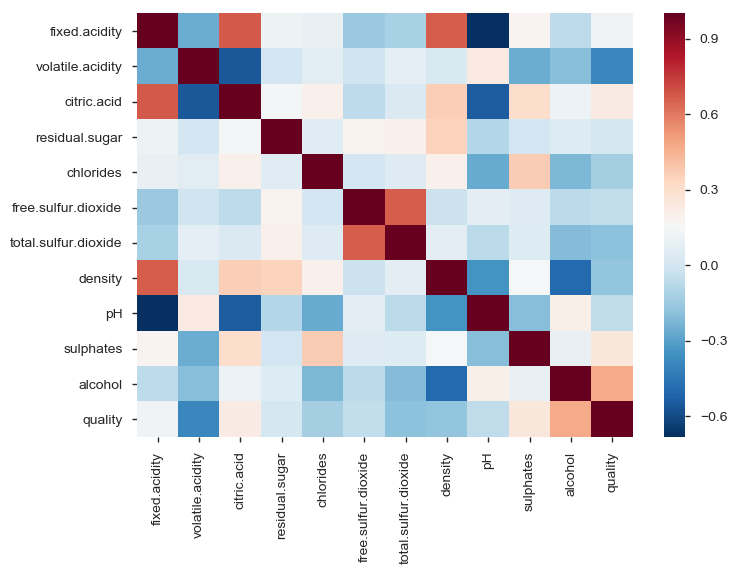

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'RdBu_r')

Ao analisar a correlação das colunas entre si, pode-se preceber que existem apenas três correlações acima de 0.6, que são: Acidez Fixa com a Densidade, Acidez Fixa com o Ácido Cítrico e o Dióxido Sulfúrico Total com o Dióxido Sulfúrico Livre.

E correlações abaixo de -0.6, que são: Acidez Fixa com o pH, Acidez Volátil com o Ácido Cítrico e Densidade com o Álcool.

Essas correlações eram esperadas, dado que são muito próximas umas das outras. As correlações podem interferir na regressão linear, pois ao se relacionarem, essa regressão deixa de ser 100% útil, já que existe outro tipo de relação, que não a linear.

Caso a Regressão não fique precisa, retirar uma das variáveis que se correlacionam pode vir a resolver o problema.

**Embaralhando o Data Frame para futura análise dos dados:**

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(3)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,8.3,0.33,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7
1,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,5
2,6.9,0.56,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5


**Separando o DataFrame em 4/5 para o treinamento e em 1/5 para o teste da regressão:**

In [7]:
treinamento = pd.DataFrame(df[:1280])
teste = pd.DataFrame(df[1280:])

**Trabalhando o DataFrame de treinamento para definirmos o que vamos analisar:**

In [8]:
X = treinamento[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

Y = treinamento['quality']

Nesse caso, vamos analisar todas as variáveis (eixo "x"), para ver o que influencia na qualidade (eixo "y").

In [9]:
Xc = sm.add_constant(X)
model = sm.OLS(Y,Xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.41
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          4.66e-117
Time:                        08:20:43   Log-Likelihood:                -1230.0
No. Observations:                1280   AIC:                             2484.
Df Residuals:                    1268   BIC:                             2546.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   16.9991     23.030      0.738      0.461     -28.181      62.179
fixed.acidity            0.0138      0.028      0.492      0.623      -0.041       0.069
volatile.acidity        -1.0864      0.133     -8.151      0.000      -1.348      -0.825
citric.acid             -0.1008      0.161     -0.628      0.530      -0.416       0.214
residual.sugar           0.0001      0.017      0.009      0.993      -0.033       0.033
chlorides               -1.8093      0.476     -3.804      0.000      -2.742      -0.876
free.sulfur.dioxide      0.0055      0.002      2.247      0.025       0.001       0.010
total.sulfur.dioxide    -0.0037      0.001     -4.596      0.000      -0.005      -0.002
density                -12.7530     23.487     -0.543      0.587     -58.831      33.325
pH                      -0.3849      0.204     -1.884      0.060      -0.786       0.016
sulphates                0.8534      0.125      6.812      0.000       0.608       1.099
alcohol                  0.2682      0.029      9.294      0.000       0.212       0.325
==============================================================================
Omnibus:                       23.933   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.970
Skew:                          -0.145   Prob(JB):                     3.45e-09
Kurtosis:                       3.804   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao analisarmos todos o "p-values", verificamos que dados como a constante, a acidez fixa, o ácido cítrico, o açúcar residual, a densidade e o pH alteravam a qualidade da regressão, por alterar, de forma considerável, o R².  

**Ajustando a regressão:**

In [10]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     9230.
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:20:44   Log-Likelihood:                -1230.3
No. Observations:                1280   AIC:                             2483.
Df Residuals:                    1269   BIC:                             2539.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity           -0.0020      0.018     -0.108      0.914      -0.037       0.034
volatile.acidity        -1.0994      0.132     -8.323      0.000      -1.359      -0.840
citric.acid             -0.1023      0.161     -0.637      0.524      -0.417       0.213
residual.sugar          -0.0071      0.014     -0.516      0.606      -0.034       0.020
chlorides               -1.8355      0.474     -3.870      0.000      -2.766      -0.905
free.sulfur.dioxide      0.0056      0.002      2.311      0.021       0.001       0.010
total.sulfur.dioxide    -0.0038      0.001     -4.662      0.000      -0.005      -0.002
density                  4.5766      0.677      6.756      0.000       3.248       5.906
pH                      -0.4660      0.172     -2.706      0.007      -0.804      -0.128
sulphates                0.8292      0.121      6.859      0.000       0.592       1.066
alcohol                  0.2844      0.019     15.187      0.000       0.248       0.321
==============================================================================
Omnibus:                       22.780   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.860
Skew:                          -0.137   Prob(JB):                     9.91e-09
Kurtosis:                       3.785   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao, apenas, retirarmos a constante da regressão, o R² melhorou de forma considerável (de 0.37 para 0.987). 

Mas, por acharmos estranho tamanha diferença, decidimos retirar todas as variáveis que tiham um "p-value" maior que 5%, para refinar ainda mais a regressão e podermos identificar possíveis erros.

**Ajustes finais:**

In [11]:
X_alt = treinamento[['volatile.acidity', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

model = sm.OLS(Y,X_alt)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:20:44   Log-Likelihood:                -1233.8
No. Observations:                1280   AIC:                             2482.
Df Residuals:                    1273   BIC:                             2518.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile.acidity        -1.0811      0.110     -9.803      0.000      -1.297      -0.865
chlorides               -1.8799      0.455     -4.132      0.000      -2.773      -0.987
total.sulfur.dioxide    -0.0026      0.001     -4.718      0.000      -0.004      -0.002
density                  4.1564      0.429      9.693      0.000       3.315       4.998
pH                      -0.3441      0.124     -2.764      0.006      -0.588      -0.100
sulphates                0.8286      0.120      6.885      0.000       0.593       1.065
alcohol                  0.2828      0.018     15.526      0.000       0.247       0.319
==============================================================================
Omnibus:                       24.585   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.148
Skew:                          -0.160   Prob(JB):                     3.16e-09
Kurtosis:                       3.794   Cond. No.                     1.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retirando todas as variáveis com um p-value maior que 5%, pudemos observar que o R² permaneceu com o mesmo valor, de forma que contentou-nos para prosseguirmos às previsões.

**Iniciando o processo de previsão:**

In [12]:
results.params

volatile.acidity       -1.081118
chlorides              -1.879892
total.sulfur.dioxide   -0.002614
density                 4.156356
pH                     -0.344132
sulphates               0.828636
alcohol                 0.282822
dtype: float64

In [13]:
coefs = np.array(results.params)
coefs

array([-1.08111792e+00, -1.87989210e+00, -2.61376931e-03,  4.15635561e+00,
       -3.44132430e-01,  8.28635702e-01,  2.82822360e-01])

In [14]:
foo = teste[['volatile.acidity', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
foo.head()

,volatile.acidity,chlorides,total.sulfur.dioxide,density,pH,sulphates,alcohol
1280,0.610,0.114,29.0,0.99740,3.26,1.56,9.1
1281,0.615,0.083,42.0,1.00220,3.07,0.73,10.0
1282,0.580,0.073,18.0,0.99680,3.36,0.57,9.5
1283,0.390,0.075,27.0,0.99598,3.06,0.84,11.4
1284,0.745,0.077,48.0,0.99739,3.20,0.47,9.7


In [15]:
teste['y_hat'] = foo.apply(lambda x: np.dot(coefs, x), axis=1)

In [16]:
teste['Previsão'] = teste['y_hat'].round(0)
teste.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,y_hat,Previsão
1280,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,5.940444,6.0
1281,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7,5.611444,6.0
1282,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,5.334577,5.0
1283,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6,6.373631,6.0
1284,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,5.101474,5.0


Rodando a previsão, percebe-se que a regressão pode prever com uma precisão considerável. Para verificar a eficiência, devemos ver a porcentagem de erros e a de acertos. Para isso, de uma forma simples, vamos adicionar a duas listas diferentes, uma com a qualidade e a previsão iguais e outra com a qualidade diferente da previsão.

**Verificando a porcentagem de acertos:**

In [17]:
acertos = 0
erros = 0
for i in range(len(teste)):
    if list(teste['quality'])[i] == list(teste['Previsão'])[i]:
        acertos += 1
    else:
        erros += 1

print('Acurácia: {0:.2f}%'.format((acertos/len(teste))*100))

SPE = 0 # Somatória do percentual dos erros
for i in range(len(teste)):
    SPE += np.sqrt((list(teste['quality'])[i] - list(teste['y_hat'])[i]) ** 2) / list(teste['quality'])[i]

erro_medio = SPE / len(teste) * 100

print('Em média, o modelo tem uma margem de erro de {0:.2f}%'.format(erro_medio))

Acurácia: 53.92%
Em média, o modelo tem uma margem de erro de 10.31%


Nosso modelo tem uma acurácia de 60% (em média)

**Desenvolvendo uma regressão com regularização:**

Baseada na regressão feita em: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

In [18]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, intercept):
    
    lassoreg = Lasso(alpha = alpha, fit_intercept = intercept, normalize = True, max_iter = 1e5)
    lassoreg.fit(data[predictors], data['quality'])
    y_pred = lassoreg.predict(data[predictors])
    
    r_squared = lassoreg.score(data[predictors], data['quality'])
    ret = [r_squared]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

A função "lasso_regression" foi definida com o "max_iter", o maior número de iterações que desejamos que o modelo faça sem que converja.

In [19]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 3e-3, 6e-3, 9e-3, 1e-2, 1e-1, 1, 5]
predictors = teste.columns.tolist()
predictors = predictors[:11]

In [20]:
col = ['R²','intercept'] + ['%s'%i for i in predictors]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,len(alpha_lasso))]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i,] = lasso_regression(teste, predictors, alpha_lasso[i], True)

In [21]:
coef_matrix_lasso

,R²,intercept,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
alpha_1e-15,0.364447,35.6058,0.0635354,-1.07634,-0.542038,0.0583783,-1.9356,0.00113568,-0.00168079,-31.8084,-0.655157,1.19209,0.322727
alpha_1e-10,0.364447,35.6058,0.0635354,-1.07634,-0.542038,0.0583783,-1.9356,0.00113568,-0.00168079,-31.8084,-0.655157,1.19209,0.322727
alpha_1e-08,0.364447,35.6049,0.0635342,-1.07634,-0.542033,0.0583779,-1.9356,0.00113566,-0.00168079,-31.8075,-0.655159,1.19209,0.322728
alpha_1e-05,0.364446,34.7521,0.0623938,-1.07466,-0.536884,0.0579178,-1.93604,0.00111232,-0.00167248,-30.9412,-0.657002,1.19017,0.323217
alpha_0.0001,0.364304,26.9987,0.0520234,-1.0596,-0.49048,0.0537409,-1.94044,0.000903475,-0.00159813,-23.0634,-0.674273,1.17283,0.327687
alpha_0.001,0.355292,3.89898,0.00350598,-0.861309,-0.00182163,0.03332,-1.86515,0,-0.00110313,-0,-0.535457,1.03885,0.322523
alpha_0.003,0.331158,2.74047,0.013433,-0.831736,0,0.00922256,-0.706608,-0,-0,0,-0.120475,0.735618,0.303149
alpha_0.006,0.288254,2.98595,0,-0.704978,0,0,-0,-0,-0,0,-0,0.417417,0.262222
alpha_0.009,0.244135,3.48479,0,-0.498159,0,0,-0,-0,-0,0,-0,0.160049,0.220172
alpha_0.01,0.225507,3.65107,0,-0.429222,0,0,-0,-0,-0,-0,-0,0.0742594,0.206156


Foram testados 12 valores para alpha, que zeraram coeficientes menos relevantes para a regressão, para generalizarmos mais a fórmula, ou seja, deixando-a menos particular.

In [22]:
col = ['R²','intercept'] + ['%s'%i for i in predictors]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,len(alpha_lasso))]
coef_matrix_lasso2 = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha_lasso)):
    coef_matrix_lasso2.iloc[i,] = lasso_regression(teste, predictors, alpha_lasso[i], False)

In [23]:
coef_matrix_lasso2

,R²,intercept,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
alpha_1e-15,0.363555,0,0.026394,-1.09482,-0.538761,0.0438224,-2.02865,0.00150743,-0.00176518,4.65455,-0.866801,1.16316,0.355466
alpha_1e-10,0.363555,0,0.026394,-1.09482,-0.538761,0.0438224,-2.02865,0.00150743,-0.00176518,4.65455,-0.866801,1.16316,0.355466
alpha_1e-08,0.363555,0,0.0263944,-1.09482,-0.538761,0.0438224,-2.02864,0.00150742,-0.00176517,4.65452,-0.866795,1.16316,0.355466
alpha_1e-05,0.363555,0,0.0267339,-1.09469,-0.53817,0.0438194,-2.02004,0.00150233,-0.00175945,4.63045,-0.860736,1.16208,0.355528
alpha_0.0001,0.3635,0,0.0297922,-1.09355,-0.532846,0.0437925,-1.94257,0.0014565,-0.00170797,4.41358,-0.806158,1.15239,0.35609
alpha_0.001,0.358061,0,0.0603316,-1.08209,-0.479584,0.0435214,-1.16834,0.000999013,-0.00119396,2.24756,-0.261022,1.05549,0.361701
alpha_0.003,0.34072,0,0.0889902,-0.993089,-0.397945,0.0401037,-0,0.00115298,-0.000718865,0.19568,0.177395,0.884502,0.388203
alpha_0.006,0.33065,0,0.0744785,-0.742387,-0.0553059,0.03606,-0,0.00253054,-0.00107277,0,0.215787,0.772609,0.392073
alpha_0.009,0.324327,0,0.0748147,-0.600889,-0,0.032847,-0,0.00312987,-0.00112298,0,0.168722,0.679163,0.403997
alpha_0.01,0.322225,0,0.0760678,-0.560765,-0,0.031847,-0,0.00327462,-0.0011166,0,0.150804,0.649534,0.408473


In [24]:
coef_matrix_lasso2.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      1
alpha_1e-10      1
alpha_1e-08      1
alpha_1e-05      1
alpha_0.0001     1
alpha_0.001      1
alpha_0.003      2
alpha_0.006      3
alpha_0.009      4
alpha_0.01       4
alpha_0.1        8
alpha_1          8
alpha_5         10
dtype: int64

A regressão com regularização (Lasso), tem como seu principal objetivo "penalizar" os coeficientes que não são relevanets (p-value elevado). Ao serem penalizadas, devem ser retiradas da regressão, com o objetivo de deixar o modelo mais condizente com a realidade, com um erro quadrático menor. Para fazê-lo, deve-se aumentar o alpha e analisar se o coeficiente chegou a zero, se sim, deve ser eliminado. Com um alpha maior, o modelo fica mais generalizado, eliminando as comdições particulares. 

Se o alpha for muito grande, todos os coeficientes ficam zerados e deixa de ser um método efetivo. 

Identificamos, na última linha de código, que um alpha acima de 0.01 zeram um número aceitável de coeficientes.

**Conclusão:**

Agora, com a nossa regressão, Vinicius JR pode escolher um vinho do bom, apenas com suas características, com uma confiança de cerca de 60%.

***Participação de cada integrante do grupo:***

Thiago e Matheus fizeram a análise exploratória.

Matheus fez a regressão inicial (sem remover nenhum coeficiente) e a regressão com regularização de Lasso.

Pedro fez a regressão final, removendo os coeficientes que não eram importantes e iniciou a regressão com regularização.

Thiago finalizou o projeto, comentando em cada linha e explicando o processo.

Todos fizeram a conclusão e a checagem final do projeto.


ps: Pedro achou o DataSet.